# Pima Indians Diabetes Database


## 1.Problem Statement:
### Predict the onset of diabetes based on diagnostic measures

## 2. Data Description 
    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
    

   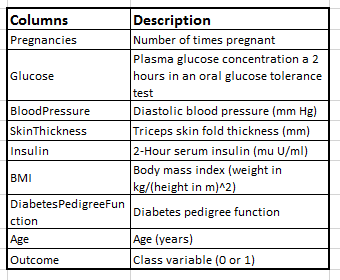
   

## 2. Importing Packages

In [1]:
pip install pyforest        # Lazy import for all teh libraries.

Note: you may need to restart the kernel to use updated packages.


Invalid requirement: '#'



In [2]:
from pyforest import *

## Importing Dataset

In [3]:
dataset = pd.read_csv("C:/Users/Chinmayi/Desktop/INSAID/ML Foundation Project/diabetes.csv")                       # Load in the data as 'dataset'

In [4]:
dataset.head()                             # Fecthing first 5 rows by default from the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape                               # This returns the number of Columns and Rows (Observation) of the Dataset

(768, 9)

In [6]:
dataset.columns                         # Returns the names of the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
dataset.info()                          # Returns the # of values in each column with its datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### The above result confirms that there are no missing values in our dataset.
#### Also there are zero categorical variables or any other column with datatype as 'object' so no need for any dummy variables or datatype conversion for any explanatory variable.

In [8]:
dataset.describe()           # Returns detailed information about the spread of values in each column.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.isnull().sum()      # This returns the no of missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Dataset is free of Missing values. Confirmed.

### Target Variable

#### Outcome is our target variable, which has values 0 and 1. Where 0 predicts the person is healthy and 1 is for the person who is diabetic. 

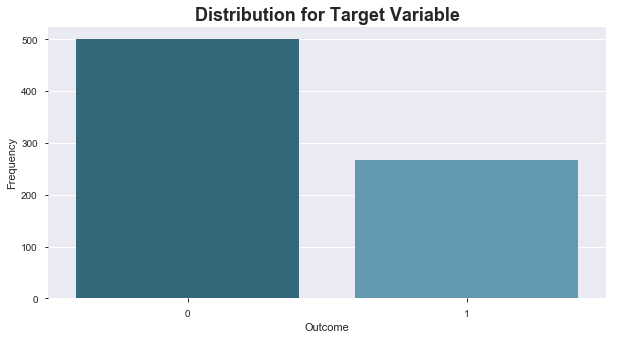

In [10]:
# Plotting graph for 'Outcome'variable
#Plotting the above count
plt.figure(figsize=(10,5))
sns.countplot('Outcome',data = dataset,palette="PuBuGn_d")
plt.title("Distribution for Target Variable",fontsize=18,fontweight="bold")
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

#### Thus it is clearly visible that the data is unbalanced. There are 268 cells with value as 1 and 500 as 0.

## Data PreProcessing

#### We run a Pre Profiling on the data set which gives us information regarding the columns and detailed report regarding the coorelation between the variables. A detailed HTML report is generated which provides us with the visualization which further can be used for detailed analysis. 

In [11]:
profile = dataset.profile_report(title='Profiling Report',style={'full_width':True})
profile.to_file(output_file="PreProcessing_Profiling.html")

### Observations from Pandas Profiling

__Dataset info__:
- Number of variables: 9
- Number of observations: 768
- Missing cells: 0
- Number of zero value cells: 758

__Variables types__: 
- Numeric = 8
- Boolean = 1


<br>

- **Age** has values ranging from 21 to 81 with no missing values and no dupilcates. It has mean value as 33.24, the values above 66.5 are outliers (Q3+1.5*IQR) {IQR=Q3-Q1=41-24=17}. and Acceptable.
- **Blood Pressure** has minimum value as 0 and maximum value as 122. It has 35 zero values.
- **BMI** The range of values is 0 to 67.1. with 11 rows with zero values.
- **Diabetes Pedigree Function**  has values from 0.078 to 2.42 with no zero values. Acceptable.
- **Glucose** values range from 0 to 199. There are 5 zero value rows. Acceptable.
- **Insulin** has values ranging from 0 t0 846.It also has 374 rows with zero values which accounts for 48.7% of total           data.
- **Pregnancies** It has values ranging from 0 to 17 with 111 zero rows.The highest value of 191 is an outlier same is the values ranging above 157.5(Q3+1.5*IQR) {IQR=Q3-Q1=123-100=23}.
- **Skin Thickness** values range from 0 to 99 with 227 zero values.


### Zero Values

In [12]:
dataset[dataset.columns[:8]].isin([0]).sum()            # Return sum of zero value cell in each column

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### Thus, there are a total of 652 cells having zero value exclunding Pregnancy as  zero value here is acceptable. All the remaining features play an important role in predicting diabetes. 

### Replacing and Imputing zero values

In [13]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# Replaces zero with 'NaN'


In [14]:
# Building a fuction to impute the zero values using groupby on target variable.
def zero_val_imputation(col): 
    df = dataset[dataset[col].notnull()]
    df = df[[col, 'Outcome']].groupby(['Outcome'])[[col]].median().reset_index()
    return df


### Insulin

In [15]:
zero_val_imputation('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


#### The Median value of Insulin for a healthy person is 102.5 while for a diabetic person is 169.5. Thus we can impute the same.

In [16]:
# Imputing values as per the outcome variable value
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['Insulin'].isnull()), 'Insulin'] = 102.5
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['Insulin'].isnull()), 'Insulin'] = 169.5

### Skin Thickness

In [17]:
zero_val_imputation('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


#### The median value of skin Thickness is 27 and 32 for a healthy and diabetic person respectively.

In [18]:
# Imputing values as per the outcome variable value
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['SkinThickness'].isnull()), 'SkinThickness'] = 27
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['SkinThickness'].isnull()), 'SkinThickness'] = 32

### Glucose

In [19]:
zero_val_imputation('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


#### The median value of Glucose is 107 and 140 for a healthy and diabetic person respectively

In [20]:
# Imputing values as per the outcome variable value
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['Glucose'].isnull()), 'Glucose'] = 107
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['Glucose'].isnull()), 'Glucose'] = 140

### BMI

In [21]:
zero_val_imputation('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


#### The median value of BMI is 30.1 and 34.3 for a healthy and diabetic person respectively.

In [22]:
# Imputing values as per the outcome variable value
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['BMI'].isnull()), 'BMI'] = 30.1
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['BMI'].isnull()), 'BMI'] = 34.3

### Blood Pressure

In [23]:
zero_val_imputation('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


#### The median value of Blood Pressure is 70 and 74.5 for a healthy and diabetic person respectively.

In [24]:
# Imputing values as per the outcome variable value
dataset.loc[(dataset['Outcome'] == 0 ) & (dataset['BloodPressure'].isnull()), 'BloodPressure'] = 70
dataset.loc[(dataset['Outcome'] == 1 ) & (dataset['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [25]:
dataset.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


### Correlation Matrix

Text(0.5, 1.0, 'Correlation between features')

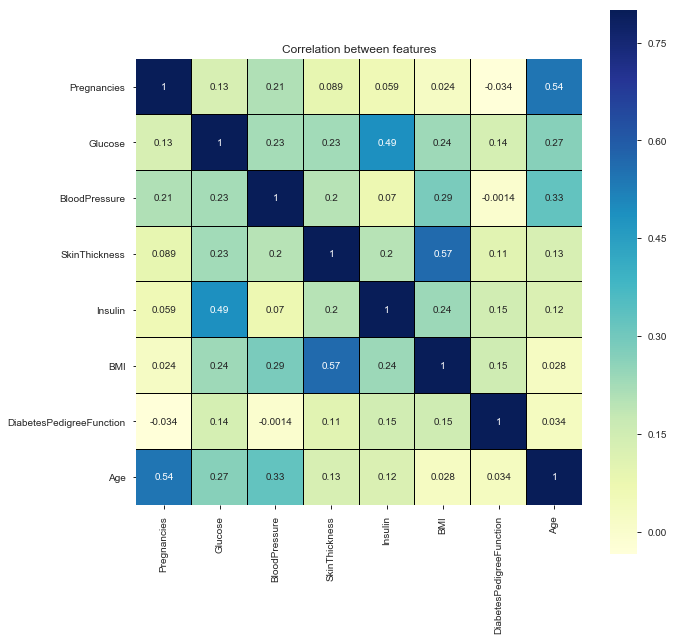

In [26]:
corr = dataset[dataset.columns[:8]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __SkinThickness and Insulin are negatively corelated with Age.__
- There is no __High coorelation__ observed between any features.
-  __BMI__ is __positively coorelated__ with all the features.
- With high corelation we face __redundancy__ issues here due to __absence of highcoorelation__ there aren't any.

## Visualizations and Exploratory Data Analysis (EDA)

####  In this section we will explore the data with Questions. We will plot the data using different visualization techniques with a combination of variables to deduce the logic behind the same.###

#### Distribution of data for all the variables:

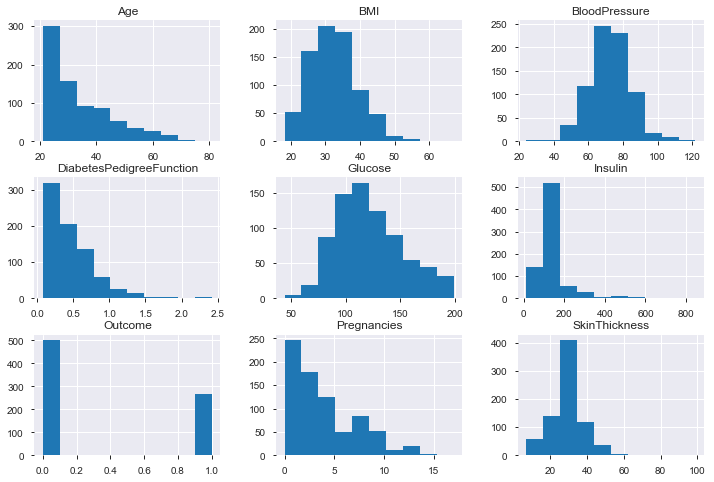

In [27]:
dataset.hist(figsize=(12, 8))
plt.show()

#### The above figure shows the distribution of data of all the variables. It shows how uniformly or skewed the distribution is. 

### What effect Age  has on Insulin value ?

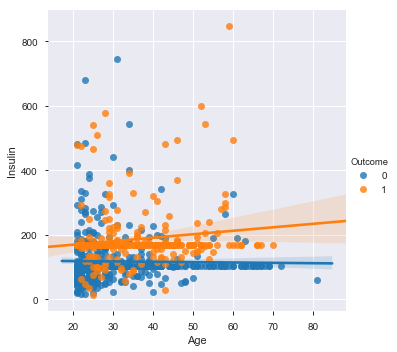

In [28]:

sns.lmplot(x='Age', y='Insulin' , hue='Outcome', data=dataset)

#### The blue line which indicates Insulin value of Healthy person is a constant  with Insulin value as 150 , whereas for a diabetic person the Insulin value is at a higher side around 180 to 210 at Age from 20 to 80.

### Relationship between Age and  Pregnancies :

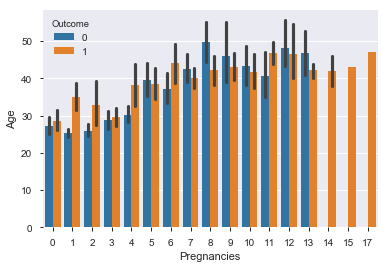

In [29]:
sns.barplot(x='Pregnancies', y= 'Age', hue= 'Outcome' , data=dataset)

#### The number of Pregnancies are higher between Age of 40 to 50.  

### Relationship between Age and Glucose

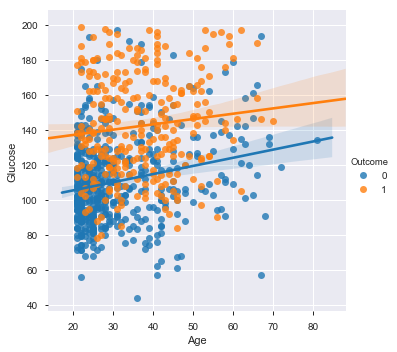

In [30]:
sns.lmplot(x='Age', y='Glucose' , hue='Outcome', data=dataset)

#### Glucose value for a healthy person in a Age range from 20 to 80 have value ranging from 105 to 135 whereas for a diabetic person it ranges from 135 to 160.

### Relationship between Age and Blood Pressure

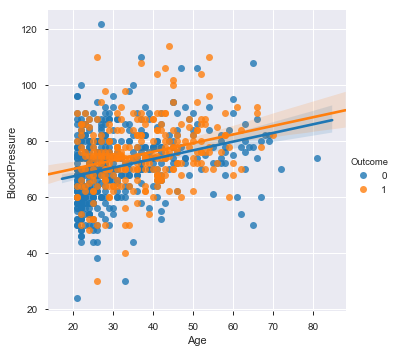

In [31]:
sns.lmplot(x='Age', y='BloodPressure' , hue='Outcome', data=dataset)

#### BllodPRessure value for a healthy person and  a diabetic person follow and incresing trend with values ranging from 65 to 90 with very little difference.

### Relationship between Age and BMI

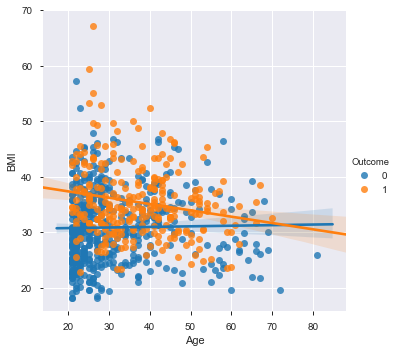

In [32]:
sns.lmplot(x='Age', y='BMI' , hue='Outcome', data=dataset)

#### BMI value for a diabetic person goes on decreasing with an increase in Age. Whereas for a healthy person it is mostly constant with a value around 30.

### Plotting a pair plot to get the relation between variables with one another:

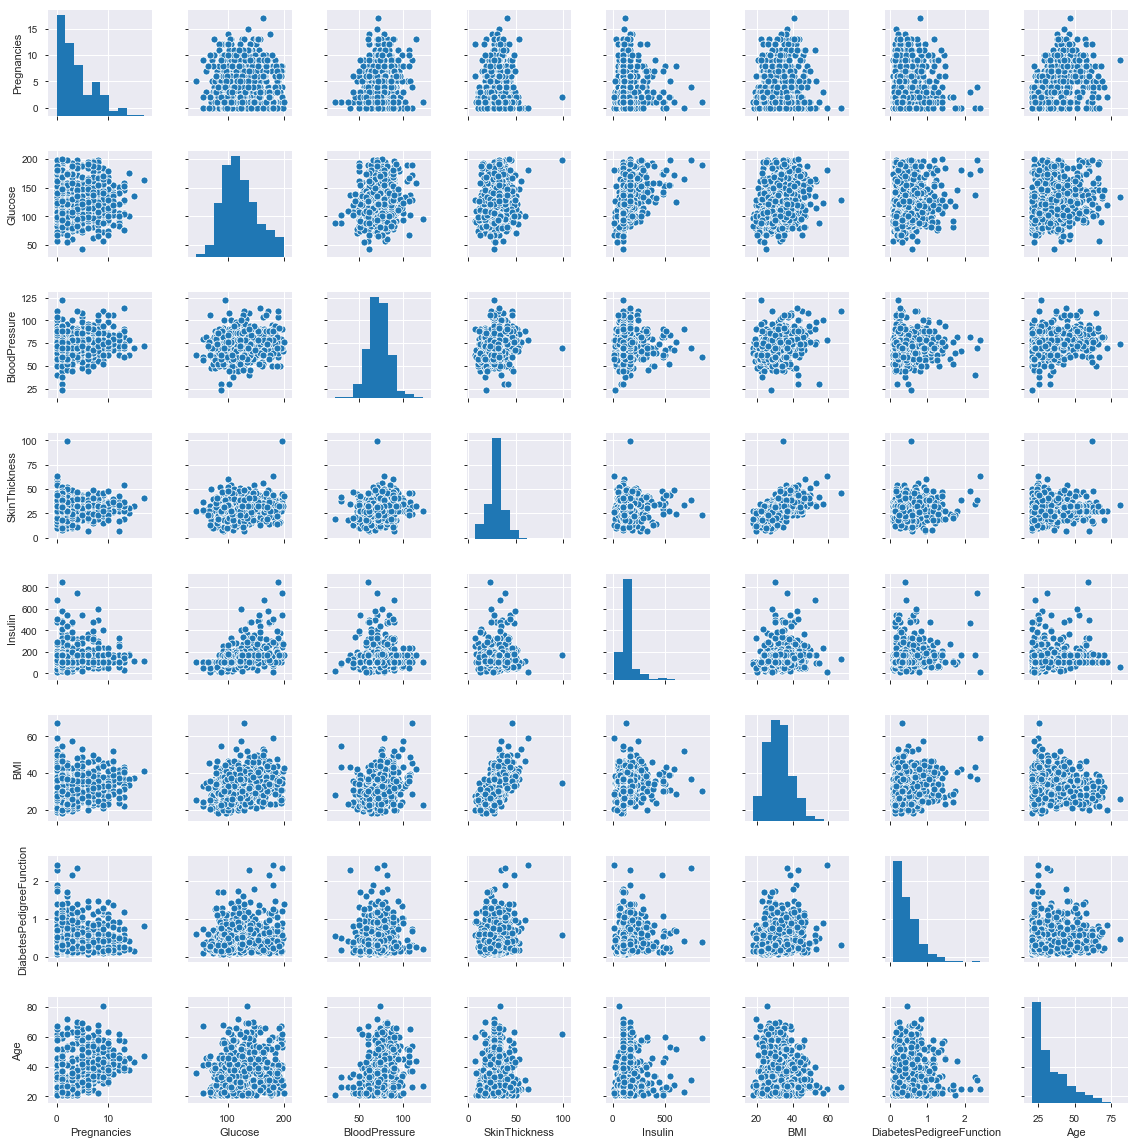

In [35]:
sns.pairplot(dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] , size=2)

### Feature Scaling of Data 

In [47]:
# Seperating Data into X (Independant Variables) and Y (Dependant Variable)
X = dataset.iloc[:, dataset.columns != 'Outcome'].values
y = dataset.iloc[:,dataset.columns == 'Outcome'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576, 1)
(192, 8)
(192, 1)


#### Thus the shape of training data X  is 576 by 8 and test set Y is 182 by 1

### Model Building 

### 1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy score for test data using Logistic Regression Algorithm is: 0.78125
Confusion Matrix using Logistic Regression is:      0   1
0  116  14
1   28  34
Precision score for test data using Logistic Regression Algorithm is: 0.7083333333333334
Recall score for test data using Logistic Regression Algorithm is: 0.5483870967741935
F1_score for test data using Logistic Regression Algorithm is: 0.6181818181818182


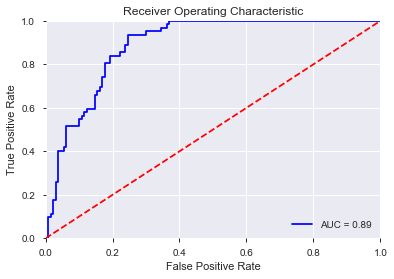

In [60]:
# Using Model for Prediction:
y_pred_train_L = logreg.predict(X_train)              # make predictions on the training set
y_pred_test_L = logreg.predict(X_test)                # make predictions on the testing set

# Model Evaluation with Accuracy Score:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using Logistic Regression Algorithm is:', accuracy_score(y_test,y_pred_test_L))

# Model Evaluation with Confusion Matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_L))
print('Confusion Matrix using Logistic Regression is:',confusion_matrix)

# Model Evaluation with Precision
from sklearn.metrics import precision_score
precision_L = precision_score(y_test,y_pred_test_L )
print('Precision score for test data using Logistic Regression Algorithm is:', precision_L)

# Model Evaluation with Recall
from sklearn.metrics import recall_score
print('Recall score for test data using Logistic Regression Algorithm is:',recall_score(y_test,y_pred_test_L))   

# Model Evaluation with F1_Score
from sklearn.metrics import f1_score
print('F1_score for test data using Logistic Regression Algorithm is:',f1_score(y_test, y_pred_test_L))

# Model Evaluation with ROC_AUC Curve
from sklearn import metrics
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The correctly predicted values are 116+34=150 and wrongly predicted are 14+28=42 out of 192.
- __Accuracy Score__ = 0.78
- __Precision Score__ = 0.70
- __Recall Score__ = 0.54
- __F1 Score__ = 0.61
- __AUC__ = 0.89

### 2. Decision Tree Classifier 

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy score for test data using Decision Tree Classifier Algorithm is: 0.8489583333333334
Confusion Matrix using Decision Tree Classifier is:      0   1
0  114  16
1   13  49
Precision score for test data using Decision Tree Classifier Algorithm is: 0.7538461538461538
Recall score for test data using Decision Tree Classifier is: 0.7903225806451613
F1_score for test data using Decision Tree Classifier is: 0.7716535433070866


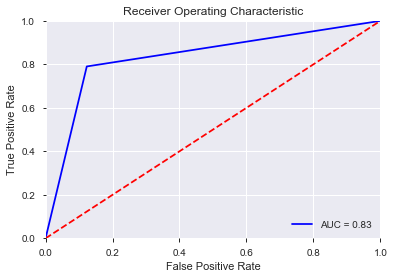

In [63]:
# Using Model for Prediction:
y_pred_train_DT = DT.predict(X_train)              # make predictions on the training set
y_pred_test_DT =  DT.predict(X_test)                # make predictions on the testing set

# Model Evaluation with Accuracy Score:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using Decision Tree Classifier Algorithm is:', accuracy_score(y_test,y_pred_test_DT))

# Model Evaluation with Confusion Matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_DT))
print('Confusion Matrix using Decision Tree Classifier is:',confusion_matrix)

# Model Evaluation with Precision
from sklearn.metrics import precision_score
precision_DT = precision_score(y_test,y_pred_test_DT )
print('Precision score for test data using Decision Tree Classifier Algorithm is:', precision_DT)

# Model Evaluation with Recall
from sklearn.metrics import recall_score
print('Recall score for test data using Decision Tree Classifier is:',recall_score(y_test,y_pred_test_DT))   

# Model Evaluation with F1_Score
from sklearn.metrics import f1_score
print('F1_score for test data using Decision Tree Classifier is:',f1_score(y_test, y_pred_test_DT))

# Model Evaluation with ROC_AUC Curve
from sklearn import metrics
probs = DT.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The correctly predicted values are 114+49=163 and wrongly predicted are 16+13=29 out of 192.
- __Accuracy Score__ = 0.84
- __Precision Score__ = 0.75
- __Recall Score__ = 0.79
- __F1 Score__ = 0.77
- __AUC__ = 0.83

### 3. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Accuracy score for test data using Random Forest Classifier Algorithm is: 0.921875
Confusion Matrix using Random Forest Classifier is:      0   1
0  122   8
1    7  55
Precision score for test data using Random Forest Classifier is: 0.873015873015873
Recall score for test data using Random Forest Classifier is: 0.8870967741935484
F1_score for test data using Random Forest Classifier is: 0.88


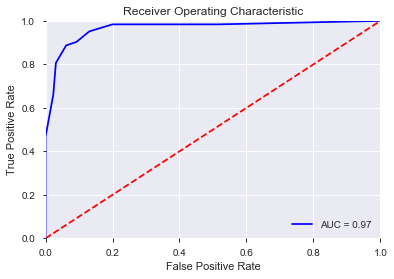

In [64]:
# Using Model for Prediction:
y_pred_train_RF = classifier.predict(X_train)              # make predictions on the training set
y_pred_test_RF =  classifier.predict(X_test)                # make predictions on the testing set

# Model Evaluation with Accuracy Score:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using Random Forest Classifier Algorithm is:', accuracy_score(y_test,y_pred_test_RF))

# Model Evaluation with Confusion Matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_RF))
print('Confusion Matrix using Random Forest Classifier is:',confusion_matrix)

# Model Evaluation with Precision
from sklearn.metrics import precision_score
precision_RF = precision_score(y_test,y_pred_test_RF )
print('Precision score for test data using Random Forest Classifier is:', precision_RF)

# Model Evaluation with Recall
from sklearn.metrics import recall_score
print('Recall score for test data using Random Forest Classifier is:',recall_score(y_test,y_pred_test_RF))   

# Model Evaluation with F1_Score
from sklearn.metrics import f1_score
print('F1_score for test data using Random Forest Classifier is:',f1_score(y_test, y_pred_test_RF))

# Model Evaluation with ROC_AUC Curve
from sklearn import metrics
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The correctly predicted values are 122+55=177 and wrongly predicted are 8+7=15 out of 192.
- __Accuracy Score__ = 0.92
- __Precision Score__ = 0.87
- __Recall Score__ = 0.88
- __F1 Score__ = 0.88
- __AUC__ = 0.97

### Assembling all the parameter values for above Models:
 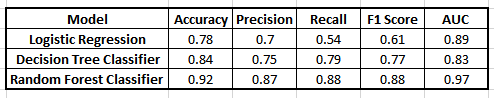

#### The above Models are being used to predict a diabetic person correctly. Hence we should consider the Recall/ Sensitivity value here, as more true positive predictions should be taken into consideration. 
#### __Random Forest Classifier__ gives us the best __Recall__ Score of __0.88__.

#### Also the AUC score i.e the are under the ROC curve value should also be considered in evaluation a successful model.
#### As per General AUC predictions:
- .90-1 = Excellent
- .80-.90 = Good
- .70-.80 = Fair
- .60-.70 = Poor
- .50-.60 = Fail

#### Hence the best AUC score which is near to 1 that is a perfect model is __Random Forest Classifier__ with value as __0.97__.



## Thus finally after evaluating all the three Models, We can conclude that __Random Forest Classifier__ works the best on the Pima Dataset.